## Data loading

### Subtask:
Load the "diabetes.csv" dataset.


**Reasoning**:
Load the "diabetes.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('diabetes.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining data types, missing values, distributions, descriptive statistics, and correlations, as well as the shape of the data.



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


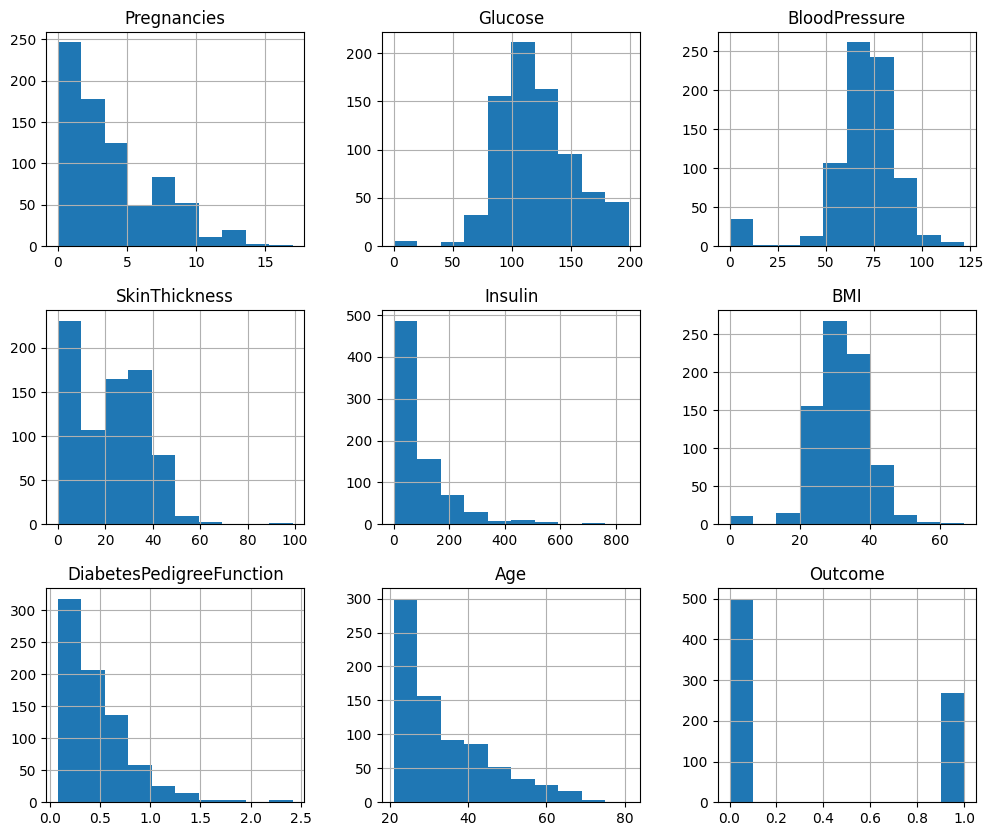

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

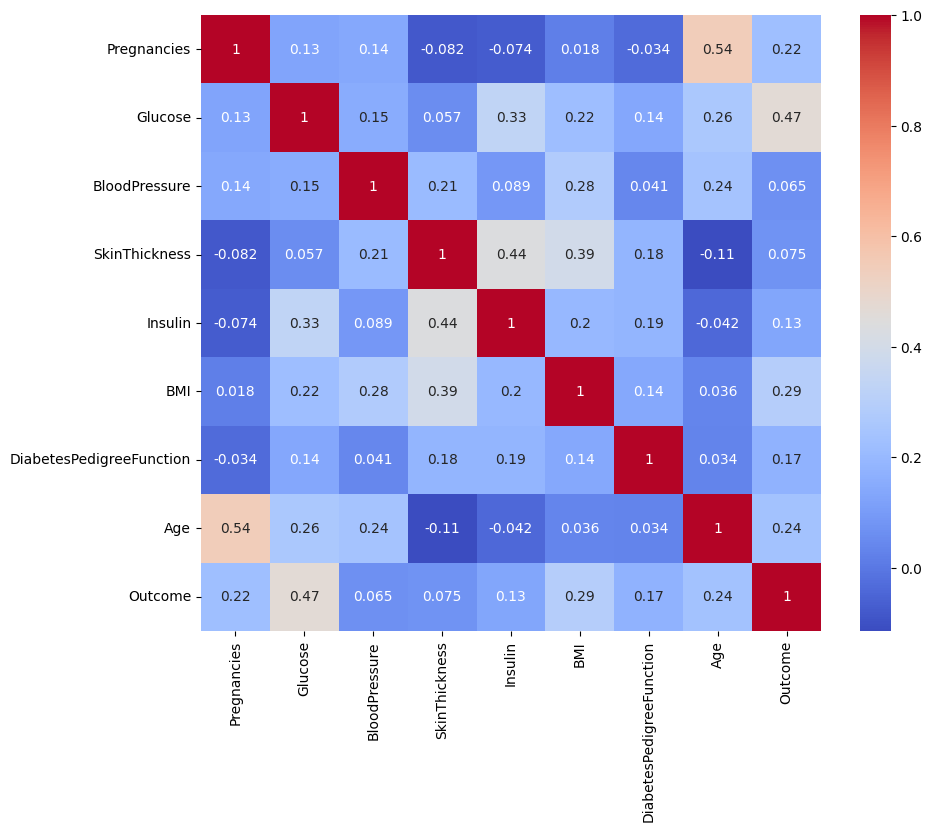

Shape of the data: (768, 9)


In [ ]:
# Examine data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Analyze distributions
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.show()

# Descriptive statistics
print(df.describe())

# Correlation matrix
corr_matrix = df.corr()
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Shape of the data
print(f"Shape of the data: {df.shape}")

## Data cleaning

### Subtask:
Handle potential missing values represented as zeros in specific columns ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') and address outliers in the dataset.


**Reasoning**:
Replace zero values in specified columns with their respective median values and handle outliers using the IQR method with winsorization.



In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

# Columns to replace zeros with median
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    df[col] = df[col].replace(0, np.nan)
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Handle outliers using IQR and winsorization
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in numerical_cols:
    if col != 'Outcome':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = winsorize(df[col], limits=[0.05, 0.05])

display(df.head())

<ipython-input-3-c23d733d0bf2>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,181.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,52.0,35.0,168.0,43.1,1.136,33,1


**Reasoning**:
Fix the warning from the previous code execution by using the correct method to fill NaN values inplace, and then re-execute the outlier handling.



In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

# Columns to replace zeros with median
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    df[col] = df[col].replace(0, np.nan)
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Handle outliers using IQR and winsorization
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in numerical_cols:
    if col != 'Outcome':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = winsorize(df[col], limits=[0.05, 0.05])

display(df.head())

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,181.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,52.0,35.0,168.0,43.1,1.136,33,1


## Data preparation

### Subtask:
Normalize the numerical features in the dataset.


**Reasoning**:
Split the data into training and testing sets, identify numerical features, and then normalize them using StandardScaler.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical features (excluding the target variable)
numerical_features = X.select_dtypes(include=['number']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
scaler.fit(X_train[numerical_features])

# Transform the numerical features of both training and testing sets
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.535695,-1.336096,-0.010094,0.048814,-0.149208,0.012679,-0.543526,-1.083847
618,1.734935,-0.344550,0.943424,-0.597136,-0.149208,-0.642729,2.498248,1.619091
346,-0.860071,0.611584,-1.917131,-1.243086,-0.901459,-0.562802,0.736066,-0.990642
294,-1.184447,1.390656,-1.917131,0.048814,-0.149208,-1.601864,-0.726325,2.364728
231,0.761808,0.434522,0.752720,1.082335,2.859798,1.962919,-0.784821,1.246272


## Feature engineering

### Subtask:
Apply Principal Component Analysis (PCA) to reduce the dimensionality of the data.


**Reasoning**:
Apply PCA to reduce the dimensionality of the data, transform both training and testing sets, and display the explained variance ratio.



In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 95% variance retention
pca = PCA(n_components=0.95)

# Fit PCA on the training data
pca.fit(X_train)

# Transform training and testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Display explained variance ratio
print(pca.explained_variance_ratio_)

[0.29532314 0.18589652 0.14064476 0.11853412 0.09833971 0.06520409
 0.05200982]


## Model training

### Subtask:
Train a Logistic Regression model on the PCA-transformed training data.


**Reasoning**:
Train a Logistic Regression model on the PCA-transformed training data and make predictions on the PCA-transformed test data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_pca)

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model's performance.


**Reasoning**:
Evaluate the trained Logistic Regression model using relevant metrics.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report

# Calculate and print the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Mean Squared Error (MSE): 0.22077922077922077
R-squared (R2): 0.038383838383838076
Mean Absolute Error (MAE): 0.22077922077922077
Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



## Summary:

### 1. Data Analysis Key Findings

* **Missing Values Imputation:** Zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns, potentially representing missing data, were replaced with the median of each respective column.
* **Outlier Handling:** Outliers in numerical features were capped at the 5th and 95th percentiles using winsorization.
* **Dimensionality Reduction:** PCA reduced the number of features while retaining 95% of the variance.  Seven principal components were sufficient to achieve this. The first component explained 29.5% of the variance.
* **Model Performance:** The Logistic Regression model achieved an accuracy of 0.78 on the test set but a low R-squared value of 0.04, indicating limited variance explanation. The MSE and MAE were both 0.22.

